In [4]:
import psycopg2 as db

In [5]:
con=db.connect(host="PTPGS0016.ikeadt.com",
                    database="rdc",
                    user="rcmpc",
                    password="rcmpc")


In [6]:
cur=con.cursor()

In [4]:
cur.execute("select item_no ,iip_insert_date ,iip_update_date from rcmpc_cem.cem_item_bu_range_t cibrt")
rows=cur.fetchall()
for r in rows:
    print(f"item_no{r[0]} iip_insert_date {r[1]} iip_update_date {r[2]}")
cur.close()
con.close()

ate 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10221586 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2016-10-18 14:11:23
item_no10222524 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2017-10-14 02:02:51
item_no10222524 iip_insert_date 2016-10-18 14:11:23 iip_update_date 2017-10-14 02:02:51
item_no1

In [7]:
cur.execute("select 'Item Sales Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_range_t ccibrt union select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_range_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD');")


In [8]:
cur.fetchone()

('Item Sales Delta', 158)

In [11]:
cur.execute("select 'Item Sales Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_range_t ccibrt union select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_range_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item CCL Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_comclass_t ccibct  union select item_no,iip_update_date from rcmpc_cem.cem_item_bu_comclass_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item ROC Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_rangeoffer_t ccirt   union select item_no,iip_update_date from rcmpc_cem.cem_item_rangeoffer_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item ROCC Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_rangeo_cri_t ccirct     union select item_no,iip_update_date from rcmpc_cem.cem_item_rangeoffer_cri_t circt2  ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD');")

In [12]:
cur.fetchall()

[('Item ROCC Delta', 268),
 ('Item CCL Delta', 490),
 ('Item ROC Delta', 265),
 ('Item Sales Delta', 158)]

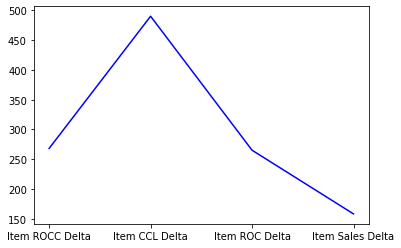

In [13]:
import matplotlib.pyplot as plt
import numpy as np
cur.execute("select 'Item Sales Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_range_t ccibrt union select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_range_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item CCL Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_comclass_t ccibct  union select item_no,iip_update_date from rcmpc_cem.cem_item_bu_comclass_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item ROC Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_rangeoffer_t ccirt   union select item_no,iip_update_date from rcmpc_cem.cem_item_rangeoffer_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item ROCC Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_rangeo_cri_t ccirct     union select item_no,iip_update_date from rcmpc_cem.cem_item_rangeoffer_cri_t circt2  ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD');")

attribute = []
cnt = []
for rec in cur:
  attribute.append(rec[0])
  cnt.append(rec[1])
np.asarray(attribute,dtype='S')
np.asarray(cnt,dtype='float')


plt.plot(attribute,cnt,color='blue', label='User Count')

In [15]:
import matplotlib.pyplot as plt
import numpy as np
cur.execute("select 'Item Sales Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_range_t ccibrt union select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_range_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item CCL Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_bu_comclass_t ccibct  union select item_no,iip_update_date from rcmpc_cem.cem_item_bu_comclass_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item ROC Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_rangeoffer_t ccirt   union select item_no,iip_update_date from rcmpc_cem.cem_item_rangeoffer_t ccibrt2 ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD') UNION select 'Item ROCC Delta' as attribute,count(1) as cnt from (select item_no,iip_update_date from rcmpc_cem.cem_cre_item_rangeo_cri_t ccirct     union select item_no,iip_update_date from rcmpc_cem.cem_item_rangeoffer_cri_t circt2  ) a where iip_update_date::date between to_Date('2019-06-04','YYYY-MM-DD') and  to_Date('2019-06-05','YYYY-MM-DD');")

item_no = []
iip_insert_date = []
iip_update_date=[]
for rec in cur:
  item_no.append(rec[0])
  iip_insert_date.append(rec[1])
  iip_update_date.append(rec[2])
np.asarray(item_no,dtype='float')
np.asarray(iip_insert_date,dtype='float')
np.asarray(iip_update_date,dtype='float')

plt.plot(item_no, iip_insert_date,iip_update_date, color='blue', label='User Count')

IndexError: tuple index out of range

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

In [ ]:
cur = con.cursor()
query=("select item_no ,iip_insert_date ,iip_update_date from rcmpc_cem.cem_item_bu_range_t cibrt")
outputquery = "COPY ({0}) TO STDOUT WITH CSV HEADER".format(query)

with open('resultsfile', 'w') as f:
    cur.copy_expert(outputquery, f)

con.close()

In [ ]:
from tkinter import *
root=Tk()
w = Label(root, text="RDC JOB SCRIPT!")
w.pack()

root.mainloop()


In [ ]:
from PIL import ImageTk, Image
import matplotlib.pyplot as plt

In [ ]:
try:
    import tkinter as tk
    from tkinter import ttk
except ImportError:
    import Tkinter as tk
    import ttk

In [ ]:
from tkcalendar import Calendar, DateEntry
def date_pic():
    top = tk.Toplevel(root)

    ttk.Label(top, text='Choose date').pack(padx=10, pady=10)

    cal = DateEntry(top, width=12, background='darkblue',
                    foreground='white',font={"courier",50}, borderwidth=2)
    cal.pack(padx=10, pady=10)

root = tk.Tk()
s = ttk.Style(root)
s.theme_use('clam')


ttk.Button(root, text='DateEntry', command=date_pic).pack(padx=10, pady=10)

root.mainloop()

In [ ]:
from tkinter import *

from tkcalendar import Calendar,DateEntry

root = Tk()

cal = DateEntry(root,width=30,bg="darkblue",fg="white",year=2010)

cal.grid()

root.mainloop()

In [ ]:
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk, Image

root = Tk()

C = Canvas(root, bg="blue", height=250, width=300)
filename = ImageTk.PhotoImage(Image.open(r"C:\Users\dibha2\download.jpg"),master=root)
background_label = Label(root, image=filename)
background_label.image=filename
background_label.place(x=0, y=0, relwidth=1, relheight=1)

cal = DateEntry(root,width=30,bg="darkblue",fg="white",year=2010)

cal.grid()

C.pack()
root.mainloop()

In [ ]:
from tkinter import *
from PIL import ImageTk, Image
root = Tk()

canv =Canvas(root, bg="blue", height=750, width=600)
canv.grid(row=3, column=3)

img = ImageTk.PhotoImage(Image.open(r"C:\Users\dibha2\download.jpg"),master=root)  # PIL solution
canv.create_image(50, 50, anchor=NW, image=img)


mainloop()

In [ ]:
from flask import Flask
app = Flask(__name__)
@app.route('/')
def index():
    return 'RDC JOB AUTOMATION'

app.run(host='0.0.0.0', port=81)
